In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.dropna(inplace=True)

In [6]:
X = df.iloc[:, 5:]
y = df[['overall_rating']]
X.shape

(180354, 37)

In [42]:
X.dtypes
y.shape

(180354, 1)

In [11]:
from sklearn import preprocessing

In [8]:
#le = preprocessing.LabelEncoder()
#X.preferred_foot = le.fit_transform(X.preferred_foot)
#X.attacking_work_rate = le.fit_transform(X.attacking_work_rate)
#X.defensive_work_rate = le.fit_transform(X.defensive_work_rate)
#X.dtypes
X = pd.get_dummies(X)
X.dtypes

potential                     float64
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina                       float64
strength                      float64
long_shots                    float64
aggression                    float64
interceptions                 float64
positioning                   float64
vision                        float64
penalties                     float64
marking     

In [18]:
xcol = X.columns.values
xcol

array(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_wo

In [28]:

#min_max_scaler = preprocessing.MinMaxScaler()
#scaled_x = min_max_scaler.fit_transform(X)


In [30]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, test_size = 0.2, random_state=6)

In [31]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_predict = lm.predict(x_test)
y_predict.shape

(36071, 1)

In [37]:
lm.score(x_test, y_test)

0.8420745286852986

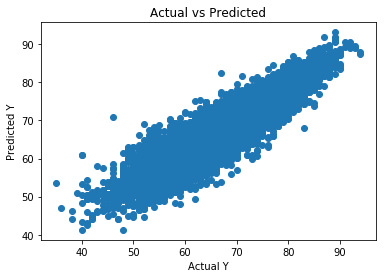

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict)

plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted')
plt.show()